# auto_annot_Martin2019_with_Smillie2019_dblabel_l1

In [1]:
import besca as bc
import scanpy as sc
import pkg_resources
import os

### Specify folders where .h5ad files are found and their names. 

The datasets that are already annotated and should be used for training. If you only use one dataset please use list of one.

In [2]:
adata_trains = [sc.read(pkg_resources.resource_filename('besca', 'datasets/data/Smillie2019_processed.h5ad'))]

The dataset of interest that should be annotated.

In [3]:
adata_pred = bc.datasets.Martin2019_processed()
adata_orig = bc.datasets.Martin2019_processed()

Define level of dblabel reference annotation

In [4]:
level = 1

Give your analysis a name.

In [5]:
analysis_name = 'auto_annot_Martin2019_with_Smillie2019_dblabel_l' + str(level)

### Now specify parameters

Specify column name of celltype annotation you want to train on.

In [6]:
celltype_train ='dblabel_l' + str(level)
celltype_test = 'dblabel_l' + str(level)

Choose a method:

- linear: Support Vector Machine with Linear Kernel
- sgd: Support Vector Machine with Linear Kernel using Stochastic Gradient Descent
- rbf: Support Vector Machine with radial basis function kernel. Very time intensive, use only on small datasets.
- logistic_regression: Standard logistic classifier iwth multinomial loss.
- logistic_regression_ovr: Logistic Regression with one versus rest classification.
- logistic_regression_elastic: Logistic Regression with elastic loss, cross validates among multiple l1 ratios.

In [7]:
method = 'logistic_regression'

Specify merge method if using multiple training datasets. Needs to be either scanorama or naive.

In [8]:
merge = 'scanorama'

Decide if you want to use the raw format or highly variable genes. Raw increases computational time and does not necessarily improve predictions.

In [9]:
use_raw = False

You can choose to only consider a subset of genes from a signature set.

In [10]:
genes_to_use = 'all'

### Translate cell type annoation to lower dblabel level

In [11]:
new_cnames = bc.tl.sig.obtain_new_label(
    nomenclature_file=pkg_resources.resource_filename('besca', 'datasets/nomenclature/CellTypes_v1.tsv'), 
    cnames=list(adata_trains[0].obs['dblabel'].cat.categories), 
    reference_label='dblabel', 
    new_label='dblabel', 
    new_level=level)

new_cnames

new_label
CD1c-positive myeloid dendritic cell                    hematopoietic cell
CD4-positive, alpha-beta memory T cell                  hematopoietic cell
CD8-positive, alpha-beta T cell                         hematopoietic cell
CD8-positive, alpha-beta cytokine secreting eff...      hematopoietic cell
CD141-positive myeloid dendritic cell                   hematopoietic cell
HEV endothelial cell                                      endothelial cell
activated CD4-positive, alpha-beta T cell               hematopoietic cell
brush cell                                                 epithelial cell
endothelial cell                                          endothelial cell
enterocyte                                                 epithelial cell
enterocyte progenitor                                      epithelial cell
enteroendocrine cell                                       epithelial cell
exhausted-like CD4-positive, alpha-beta T cell          hematopoietic cell
fibroblast                                          connective tissue cell
follicular B cell                                       hematopoietic cell
germinal center B cell                                  hematopoietic cell
glial cell                                                     neural cell
goblet cell                                                epithelial cell
immature enterocyte                                        epithelial cell
immature goblet cell                                       epithelial cell
inflammatory fibroblast                             connective tissue cell
inflammatory monocyte                                   hematopoietic cell
innate lymphoid cell                                    hematopoietic cell
macrophage                                              hematopoietic cell
mast cell                                               hematopoietic cell
microfold cell                                             epithelial cell
microvascular endothelial cell                            endothelial cell
myofibroblast cell                                        contractile cell
natural killer cell                                     hematopoietic cell
pericyte cell                                       connective tissue cell
plasma cell                                             hematopoietic cell
proliferating B cell                                    hematopoietic cell
proliferating T cell                                    hematopoietic cell
proliferating monocyte                                  hematopoietic cell
proliferating transit amplifying cell                      epithelial cell
regulatory T cell                                       hematopoietic cell
stem cell                                                   precursor cell
transit amplifying cell                                    epithelial cell

In [12]:
adata_trains[0].obs['dblabel_l' + str(level)] = bc.tl.sig.add_anno(adata_trains[0], new_cnames, 'new_label', 'dblabel')

In [13]:
new_cnames = bc.tl.sig.obtain_new_label(
    nomenclature_file=pkg_resources.resource_filename('besca', 'datasets/nomenclature/CellTypes_v1.tsv'), 
    cnames=list(adata_pred.obs['dblabel'].cat.categories), 
    reference_label='dblabel', 
    new_label='dblabel', 
    new_level=level)

new_cnames

new_label
CD4-positive, alpha-beta memory T cell         hematopoietic cell
CD8-positive, alpha-beta cytotoxic T cell      hematopoietic cell
CD8-positive, alpha-beta memory T cell         hematopoietic cell
HEV endothelial cell                             endothelial cell
IgG plasma cell                                hematopoietic cell
IgM or IgA plasma cell                         hematopoietic cell
blood vessel endothelial cell                    endothelial cell
fibroblast                                 connective tissue cell
group 1 innate lymphoid cell                   hematopoietic cell
group 3 innate lymphoid cell                   hematopoietic cell
intestinal epithelial cell                        epithelial cell
memory B cell                                  hematopoietic cell
memory T cell                                  hematopoietic cell
myeloid dendritic cell                         hematopoietic cell
myeloid leukocyte                              hematopoietic cell
naive B cell                                   hematopoietic cell
naive T cell                                   hematopoietic cell
neural cell                                           neural cell
pericyte cell                              connective tissue cell
plasmacytoid dendritic cell                    hematopoietic cell
proliferating T cell                           hematopoietic cell
regulatory T cell                              hematopoietic cell

In [14]:
adata_pred.obs['dblabel_l' + str(level)] = bc.tl.sig.add_anno(adata_pred, new_cnames, 'new_label', 'dblabel')
adata_orig.obs['dblabel_l' + str(level)] = adata_pred.obs['dblabel_l' + str(level)] 

### Merge all training and the testing set.

This function merges training datasets, removes unwanted genes, and if scanorama is used corrects for datasets.

In [15]:
adata_train, adata_pred = bc.tl.auto_annot.merge_data(adata_trains, adata_pred, genes_to_use = genes_to_use, merge = merge)

merging with scanorama
using scanorama rn
Found 1054 genes among all datasets
[[0.         0.55297257]
 [0.         0.        ]]
Processing datasets (0, 1)
integrating training set
calculating intersection


### Train the classifier.

The returned scaler is fitted on the training dataset (to zero mean and scaled to unit variance).

In [16]:
classifier, scaler = bc.tl.auto_annot.fit(adata_train, method, celltype_train)

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   5 out of   5 | elapsed: 13.5min finished


### Prediction

Use fitted model to predict celltypes in adata_pred. Prediction will be added in a new column called 'auto_annot'. Paths are needed as adata_pred will revert to its original state (all genes, no additional corrections).
The threshold should be set to 0 or left out for SVM. For logisitic regression the threshold can be set.

In [17]:
adata_predicted = bc.tl.auto_annot.adata_predict(classifier = classifier, scaler = scaler, adata_pred = adata_pred, adata_orig = adata_orig, threshold = 0)

Write out metrics to a report file, create confusion matrices and comparative umap plots

acc: 0.96
f1: 0.97
ami: 0.78
ari: 0.85
silhouette dblabel_l1: 0.11
silhouette auto_annot: -0.09
pair confusion matrix:
           0           1
0  835842298    22424826
1  196208132  2814551346


... storing 'auto_annot' as categorical


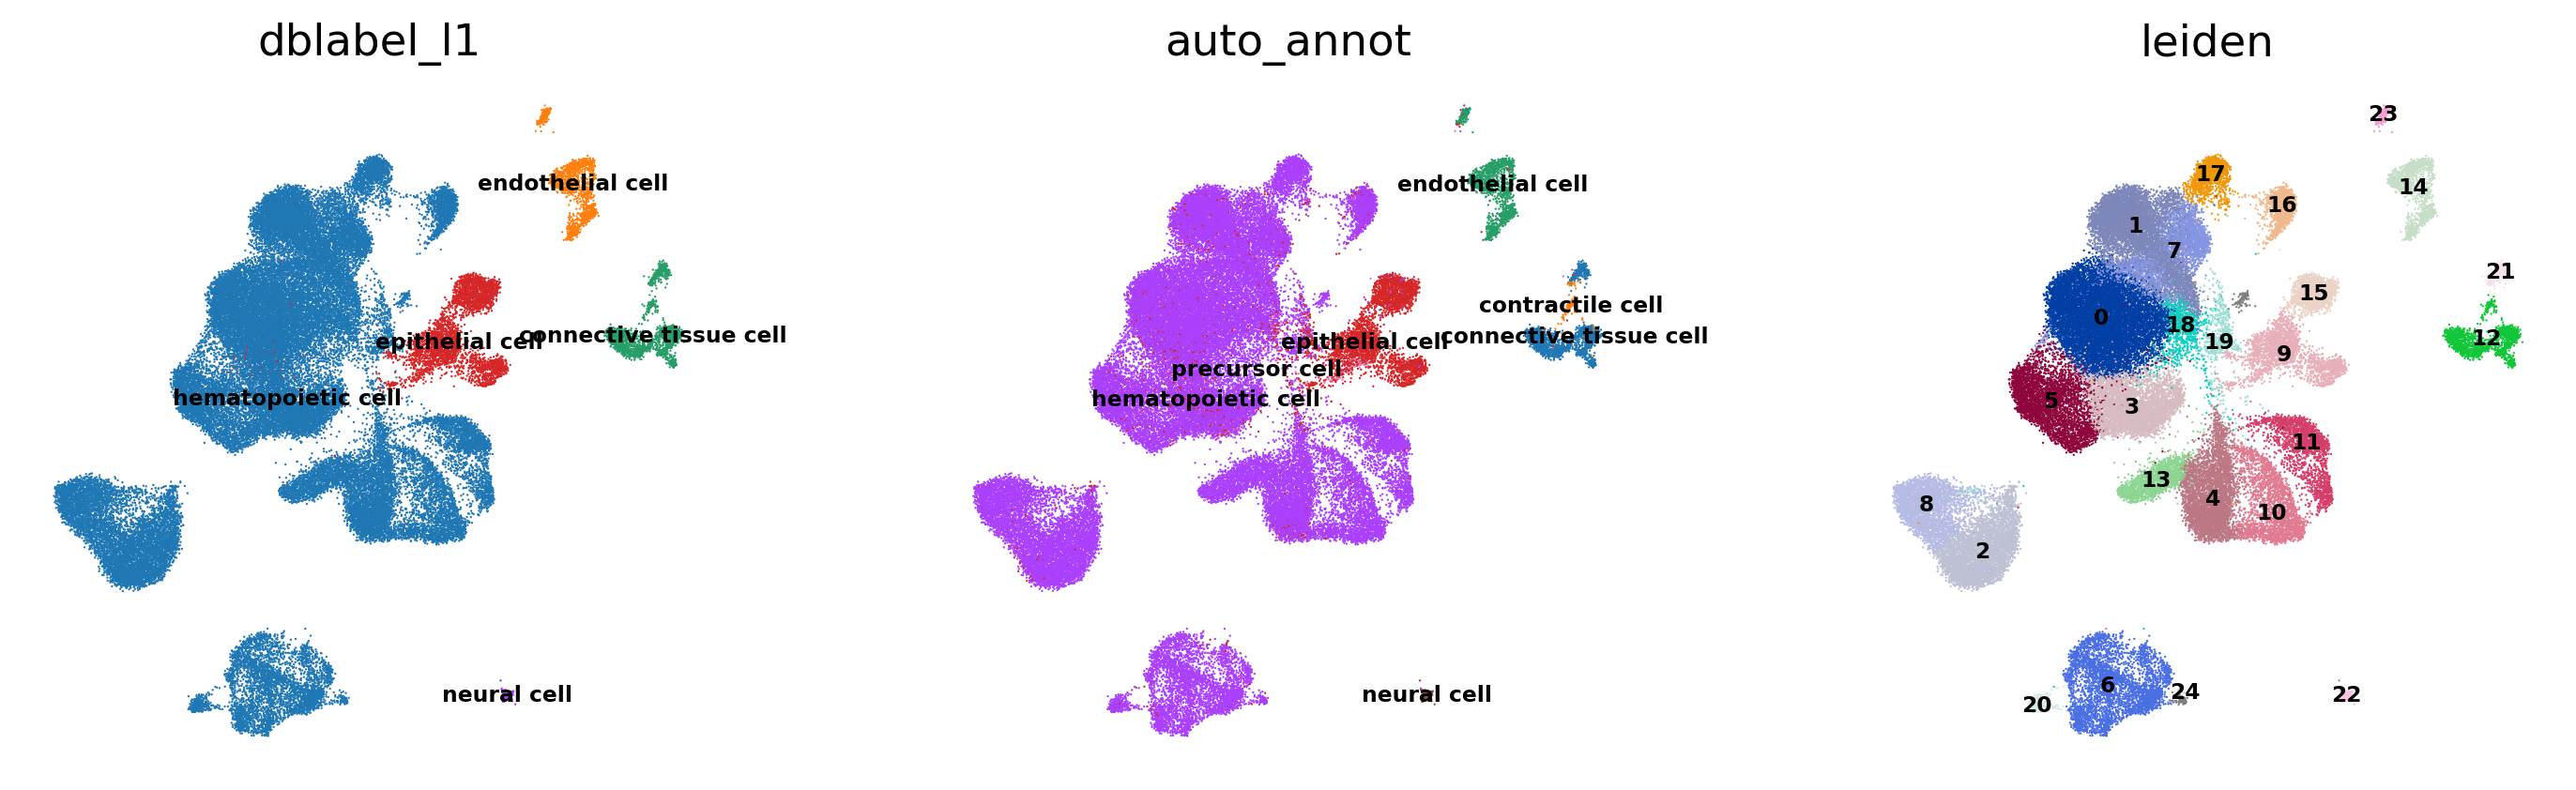

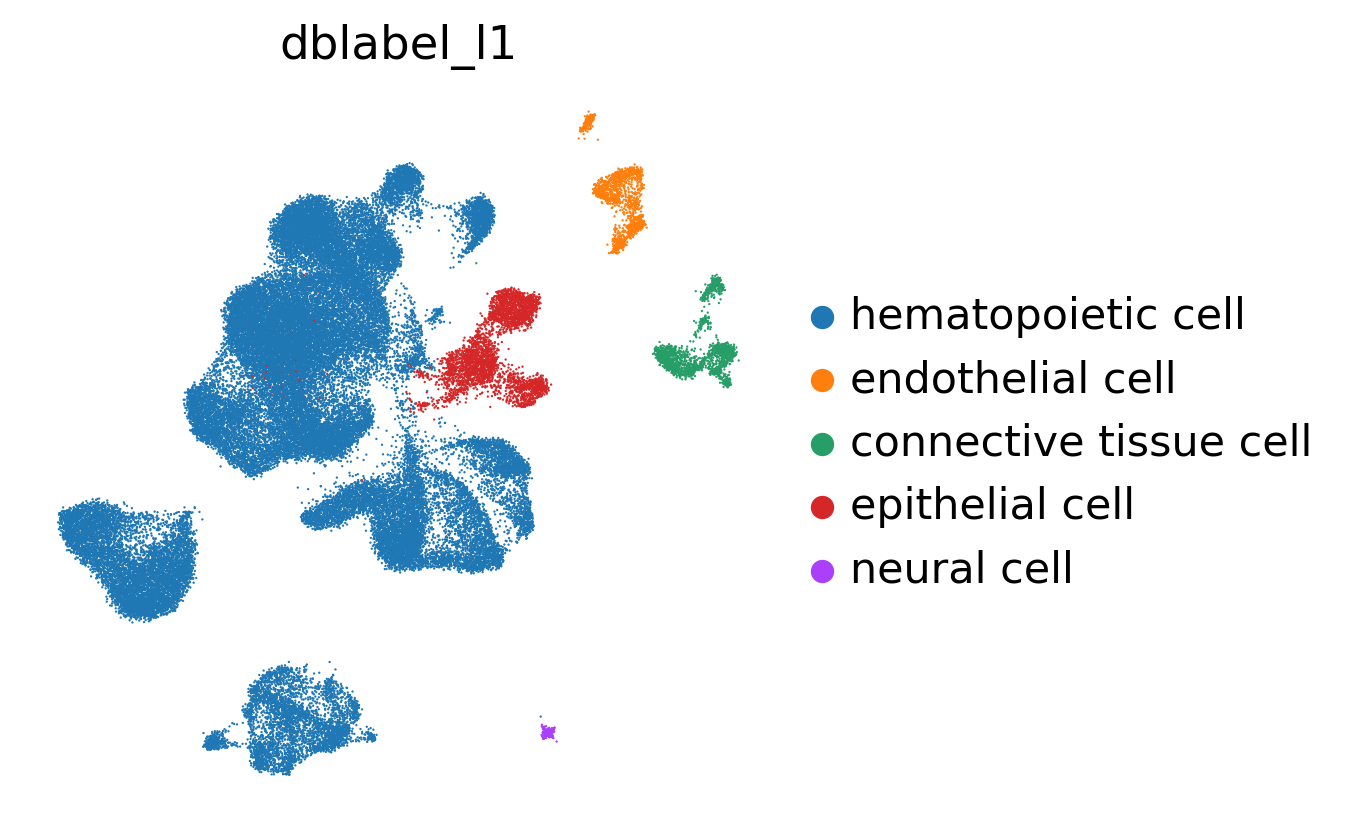

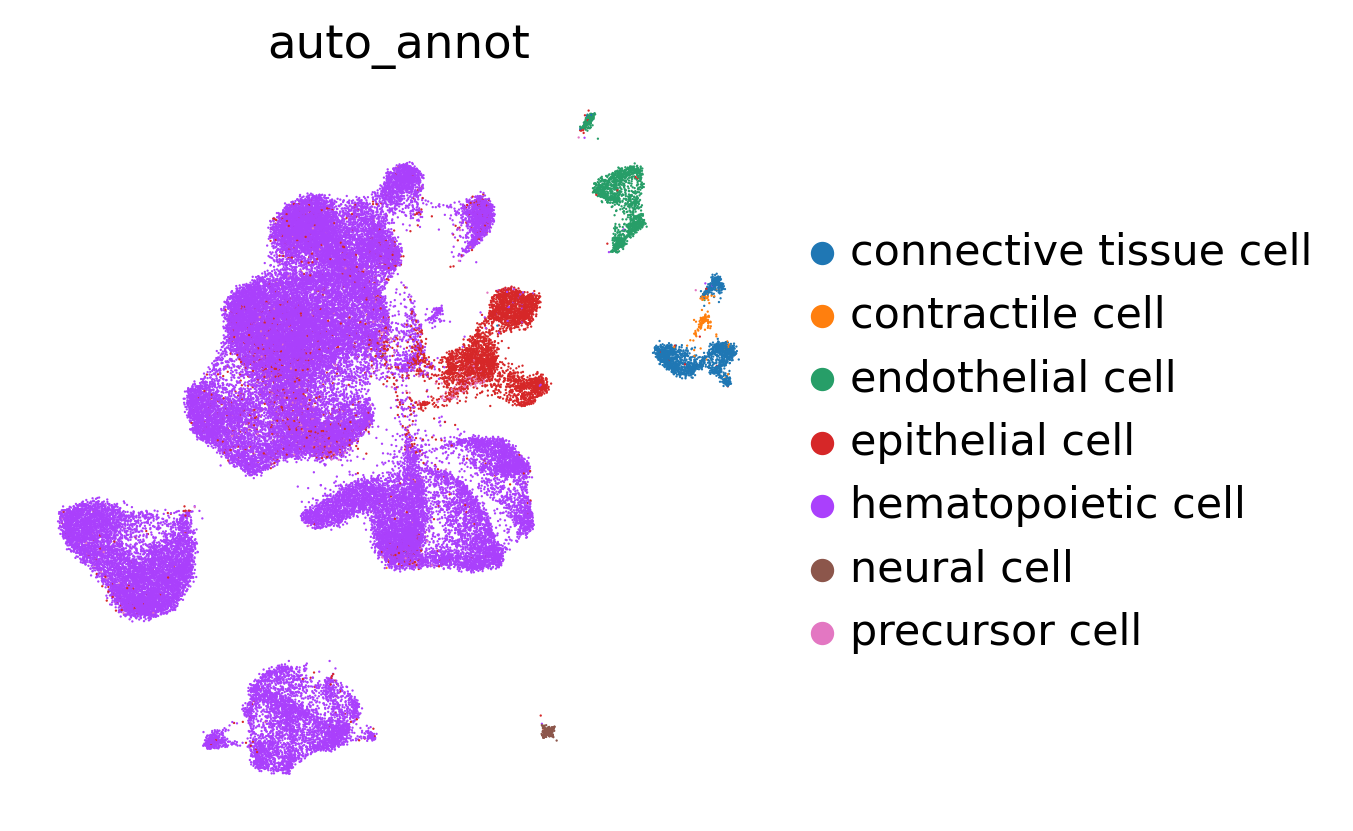

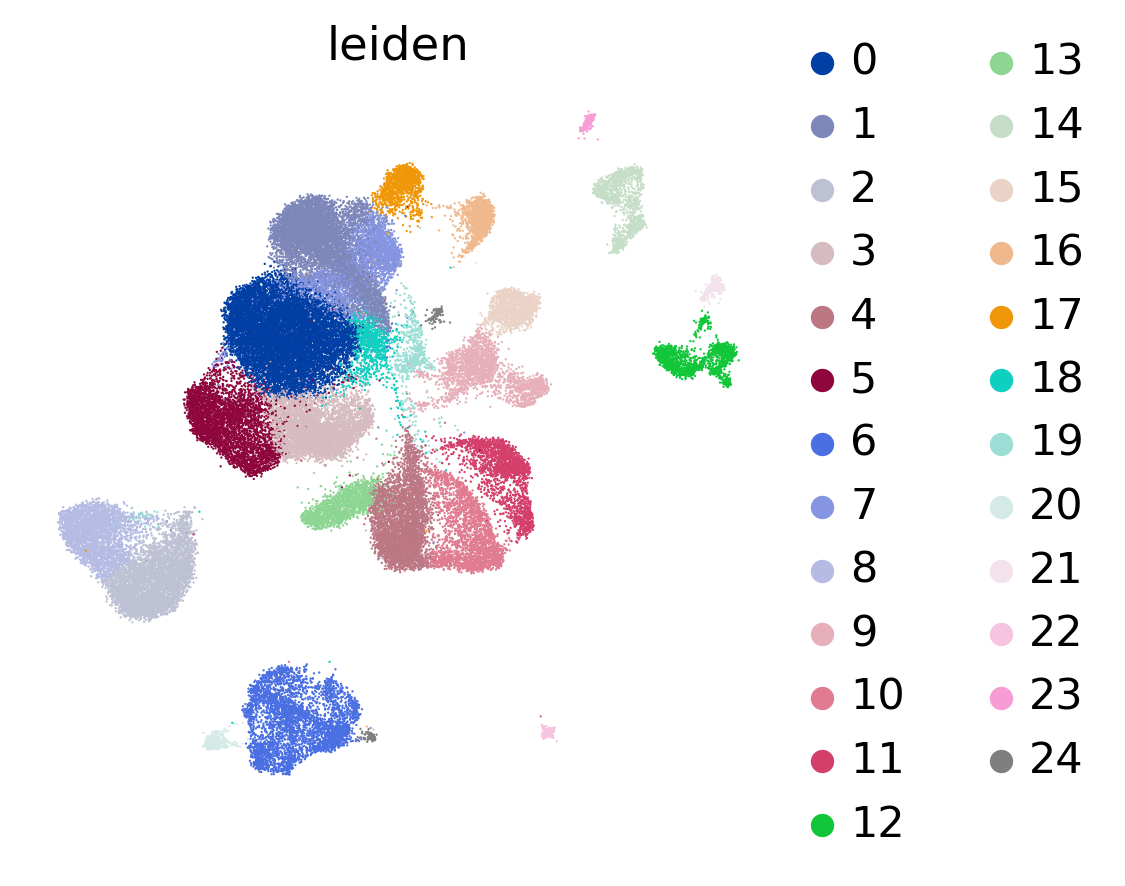

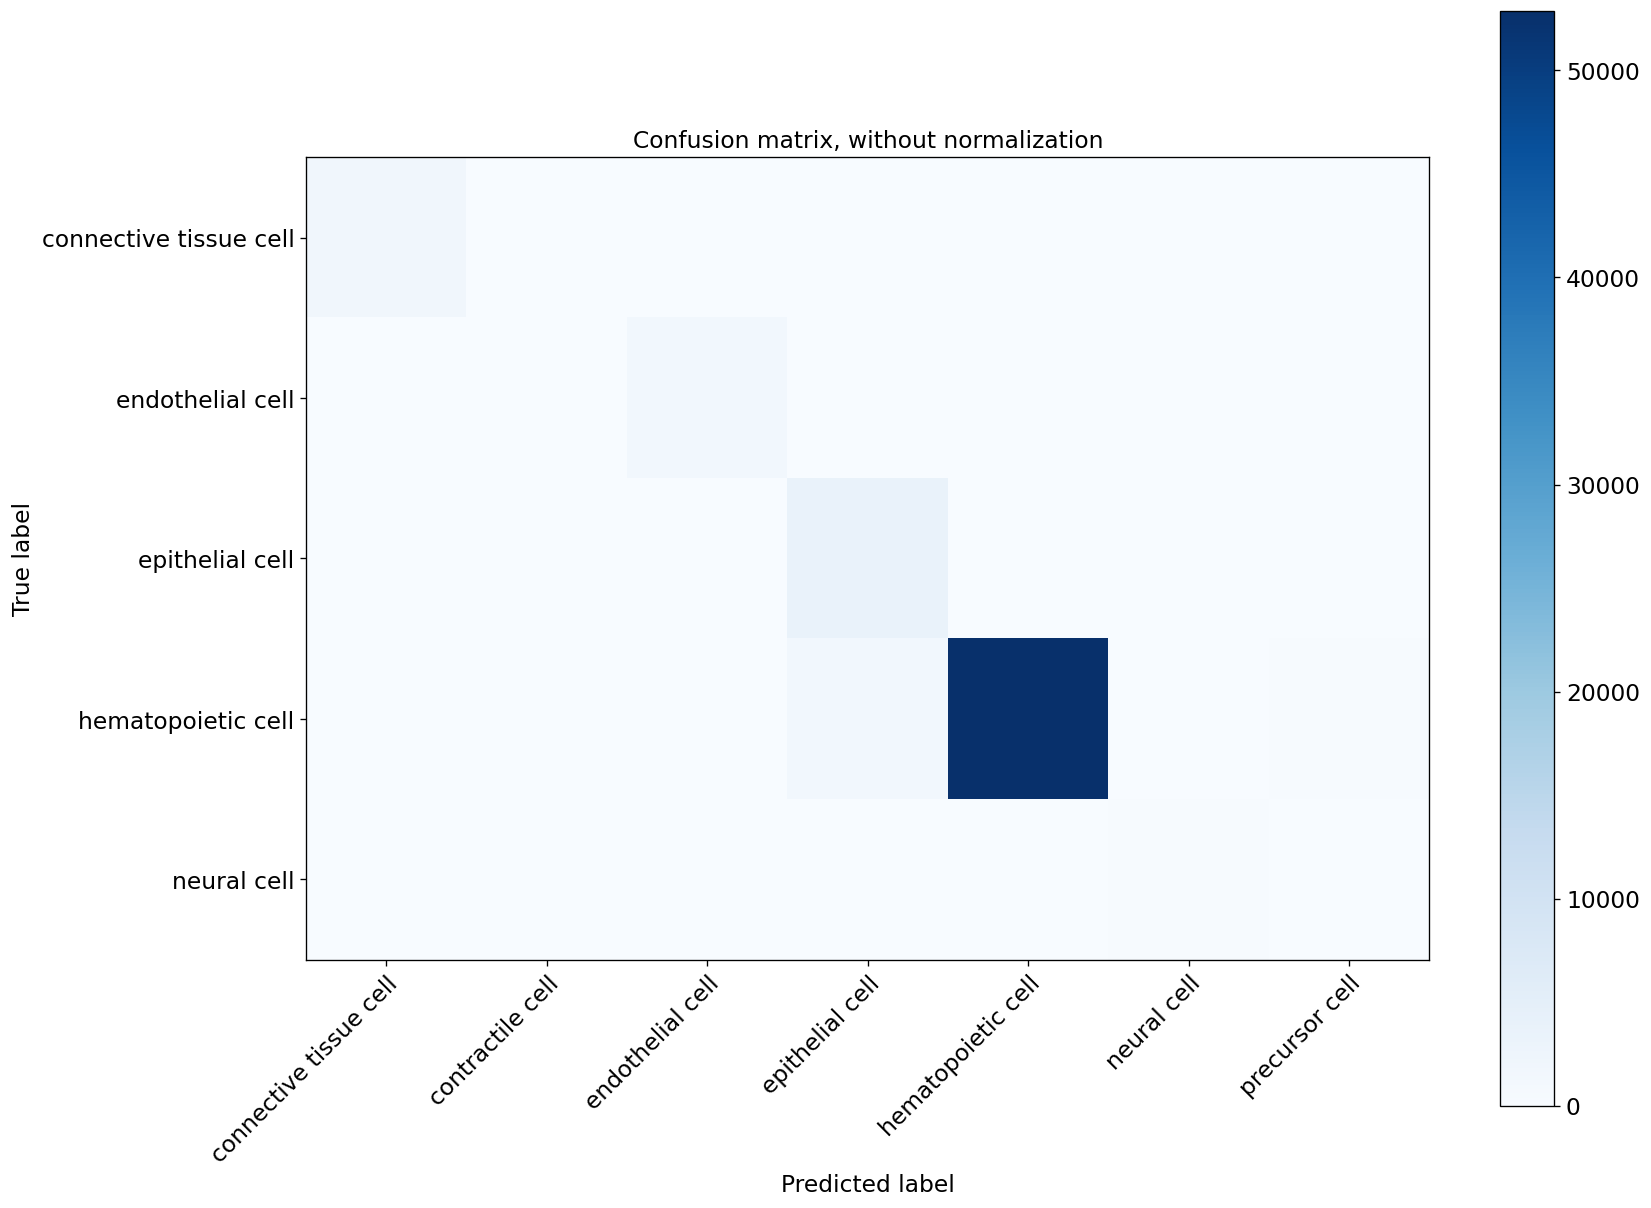

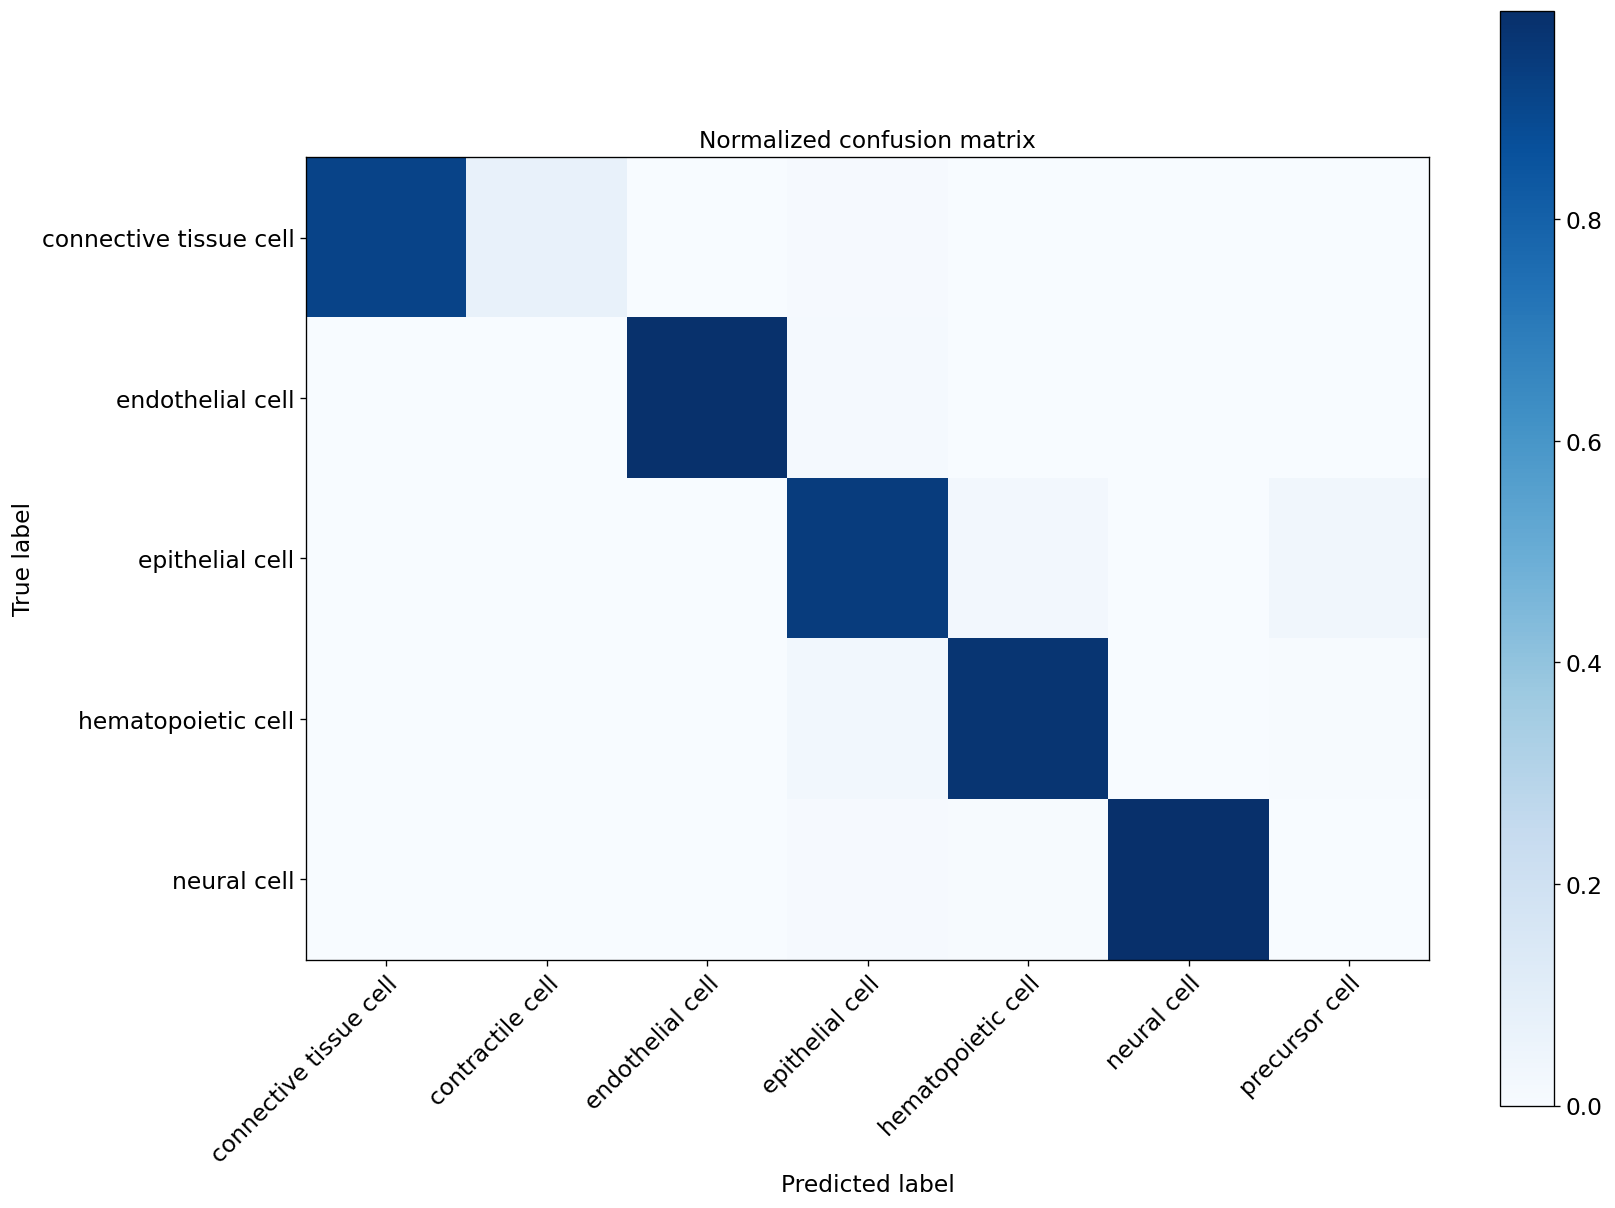

In [19]:
%matplotlib inline

bc.tl.report(
    adata_pred=adata_predicted,
    celltype=celltype_test, 
    method=method, 
    analysis_name=analysis_name,
    train_datasets = adata_trains,
    test_dataset = adata_orig,
    merge = merge,
    name_prediction='auto_annot', 
    name_report='auto_annot', 
    use_raw=use_raw,
    remove_nonshared=True, 
    clustering='leiden', 
    asymmetric_matrix=True, 
    delimiter='\t', 
    verbose=True
)

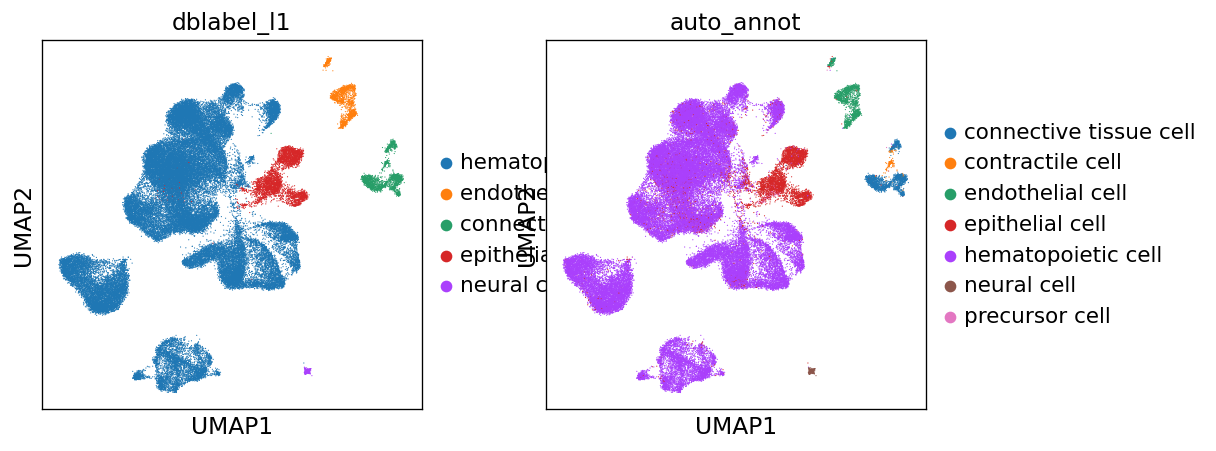

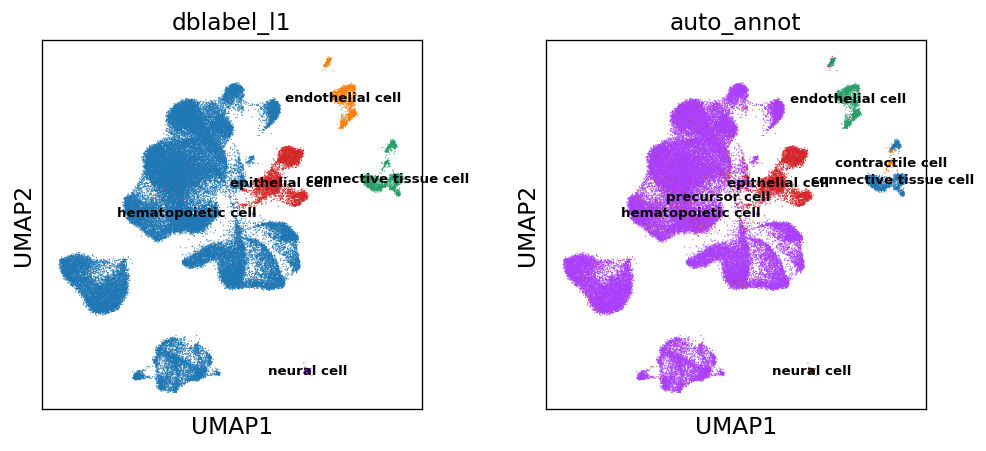

In [20]:
sc.pl.umap(adata_predicted, color=[celltype_test, 'auto_annot'])
sc.pl.umap(adata_predicted, color=[celltype_test, 'auto_annot'], legend_loc='on data', legend_fontsize=8)

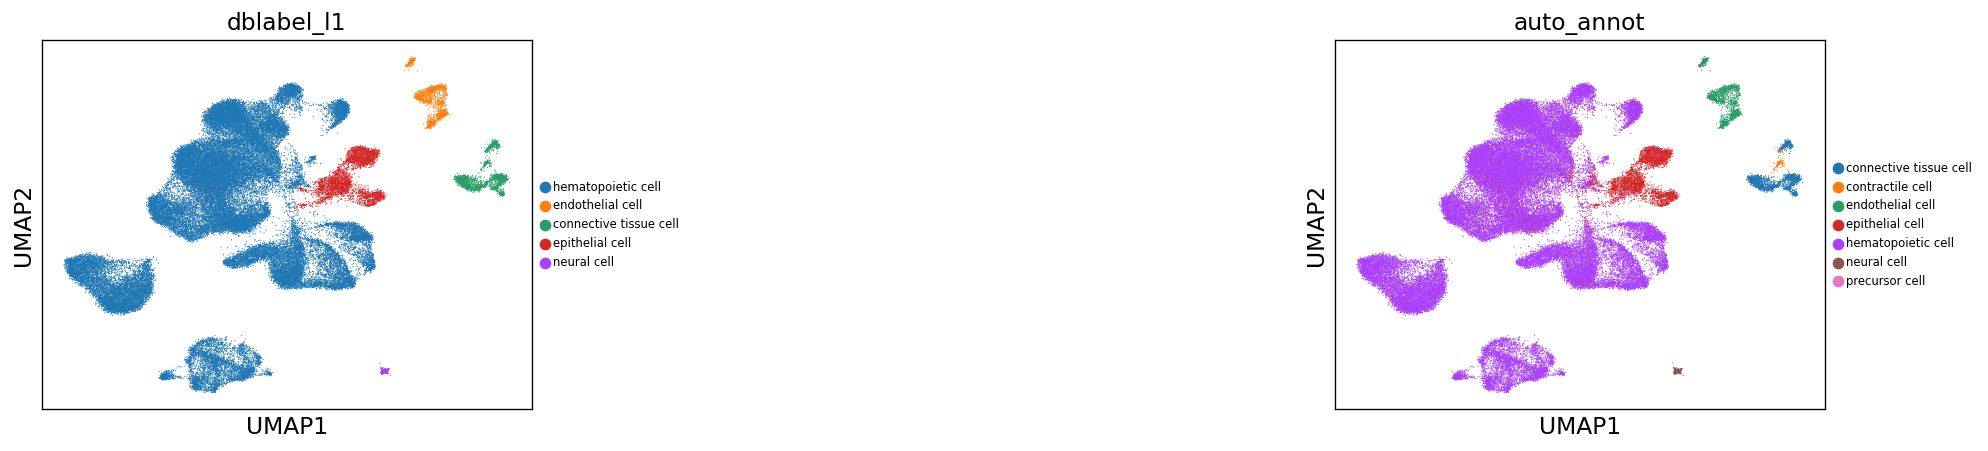

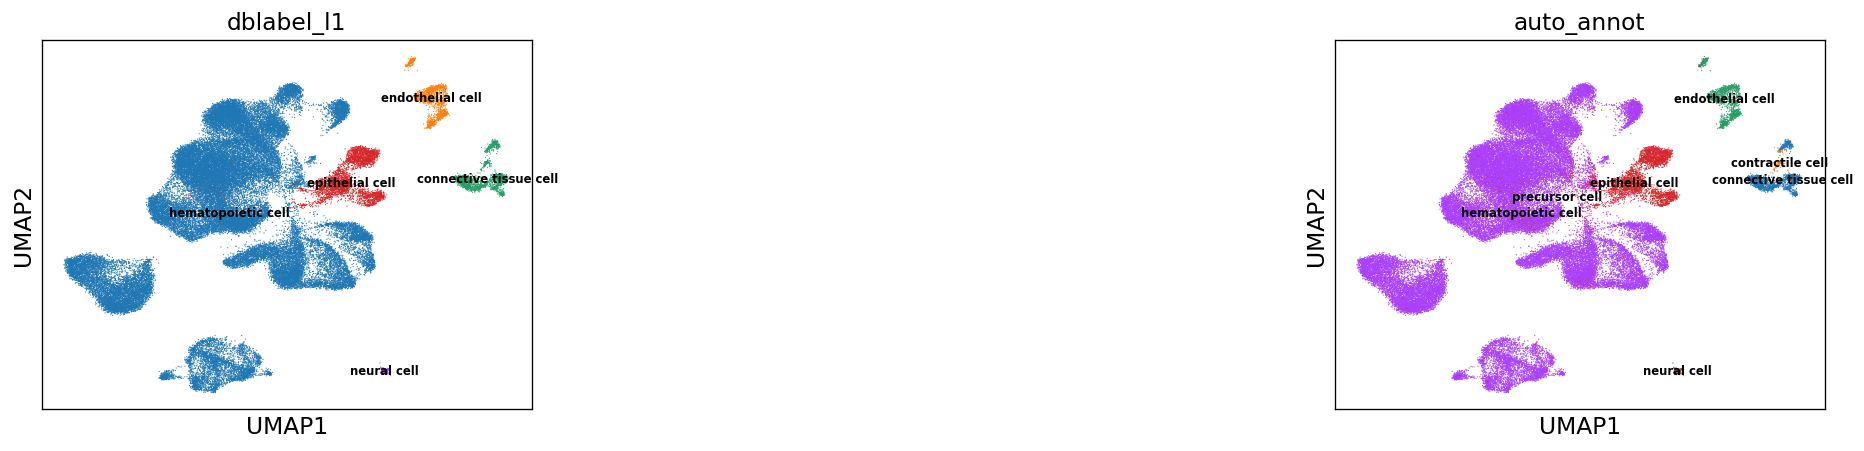

In [21]:
sc.pl.umap(adata_predicted, color=[celltype_test, 'auto_annot'], legend_fontsize=7, wspace = 1.4, save = '.svg')
sc.pl.umap(adata_predicted, color=[celltype_test, 'auto_annot'], legend_loc='on data', legend_fontsize=7, wspace = 1.4, save = '.ondata.svg')

In [22]:
adata_train

View of AnnData object with n_obs × n_vars = 149732 × 1054
    obs: 'CELL', 'Cluster', 'Health', 'Location', 'Subject', 'celltype_highlevel', 'nGene', 'nUMI', 'original_name', 'percent_mito', 'n_counts', 'n_genes', 'batch', 'leiden', 'dblabel', 'celltype', 'cluster_celltype', 'Type', 'dblabel_l1'
    var: 'SYMBOL', 'ENSEMBL-0', 'n_cells-0', 'total_counts-0', 'frac_reads-0', 'ENSEMBL-1', 'n_cells-1', 'total_counts-1', 'frac_reads-1'
    uns: 'Cluster_colors', 'Location_colors', 'Type_colors', 'celltype_highlevel_colors', 'leiden', 'leiden_colors', 'umap'
    obsm: 'X_pca', 'X_umap', 'X_scanorama'

acc: 0.78
f1: 0.78
ami: 0.0
ari: -0.0
silhouette dblabel_l1: 0.11
silhouette random_labeling: -0.04
pair confusion matrix:
           0           1
0  189450828   668816296
1  668816296  2341943182


... storing 'random_labeling' as categorical


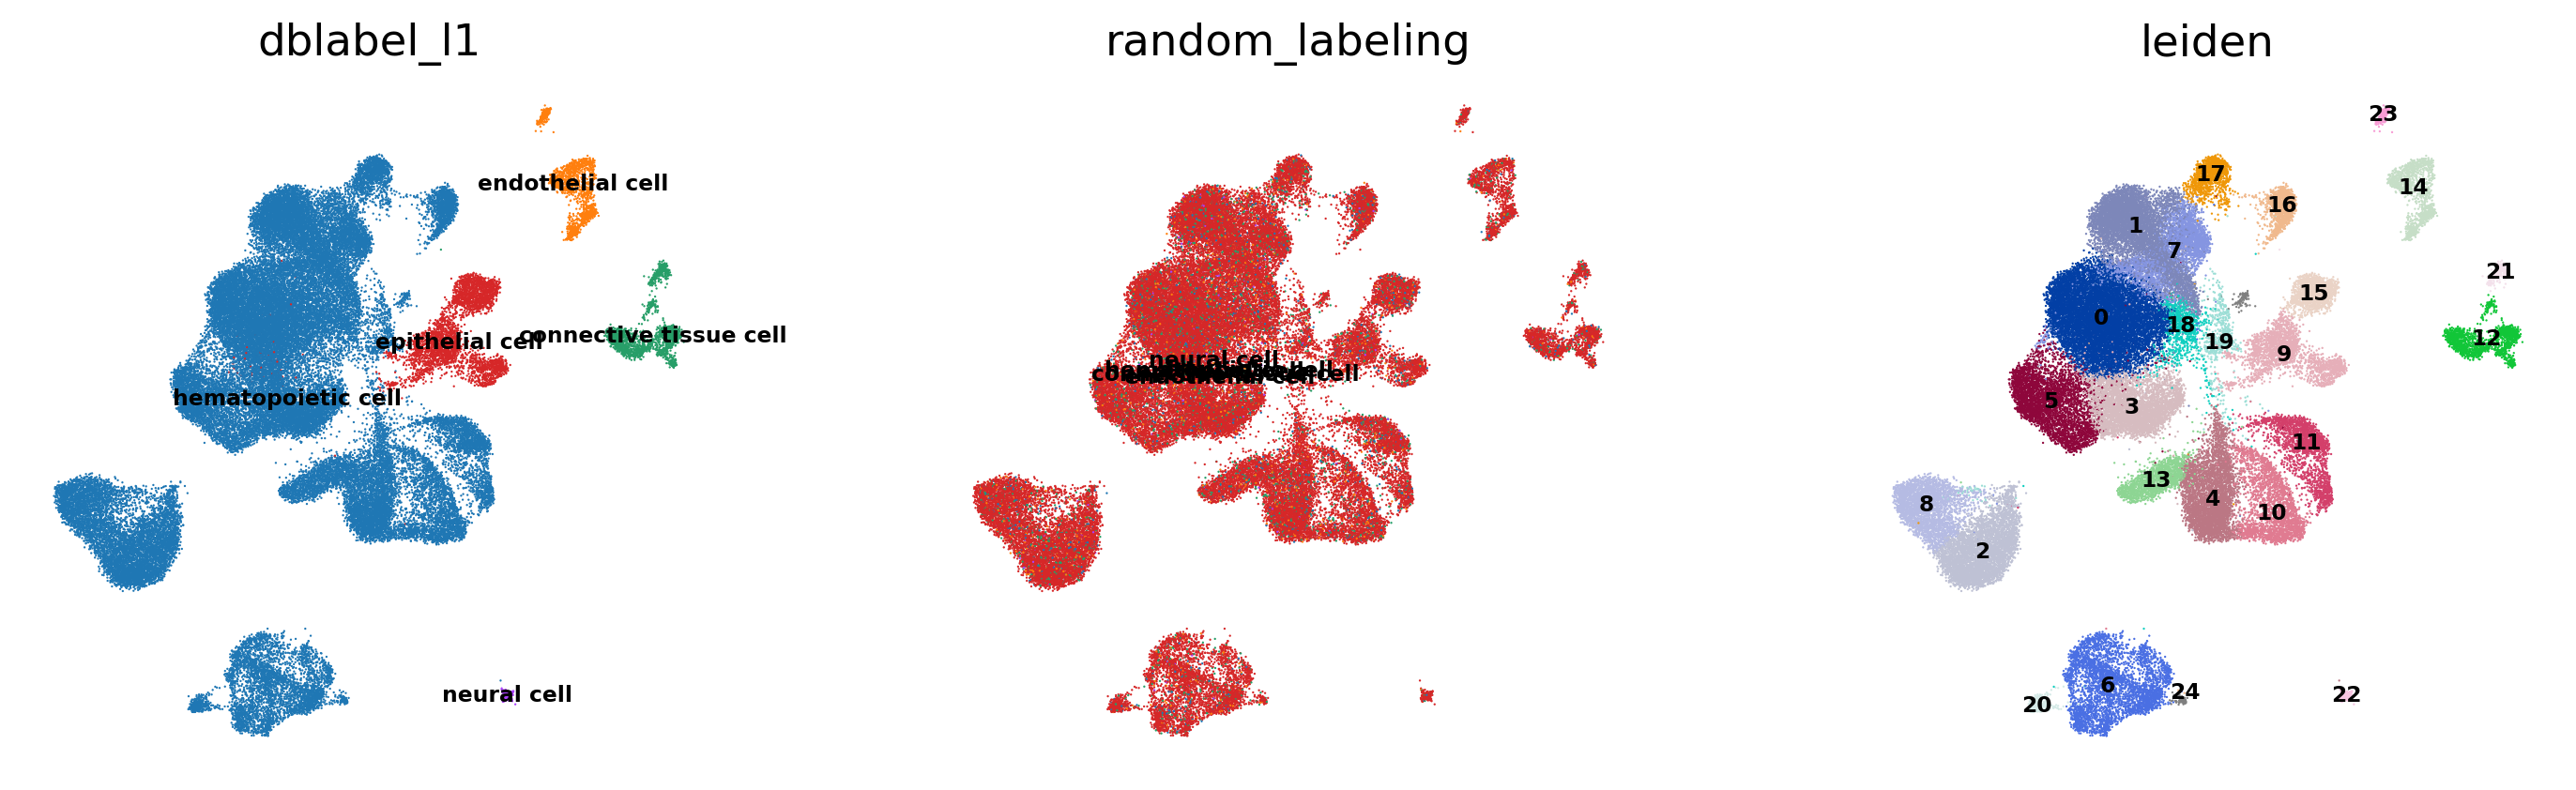

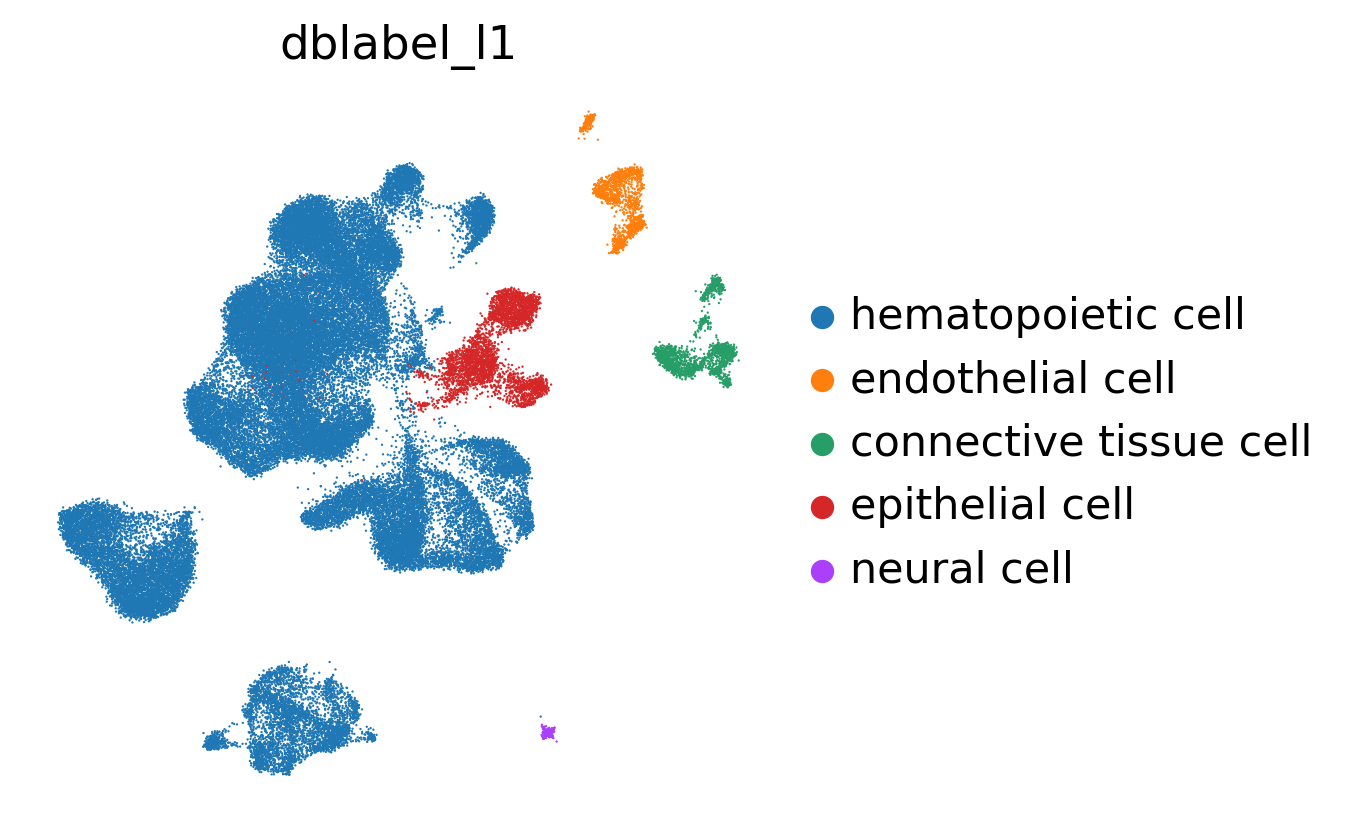

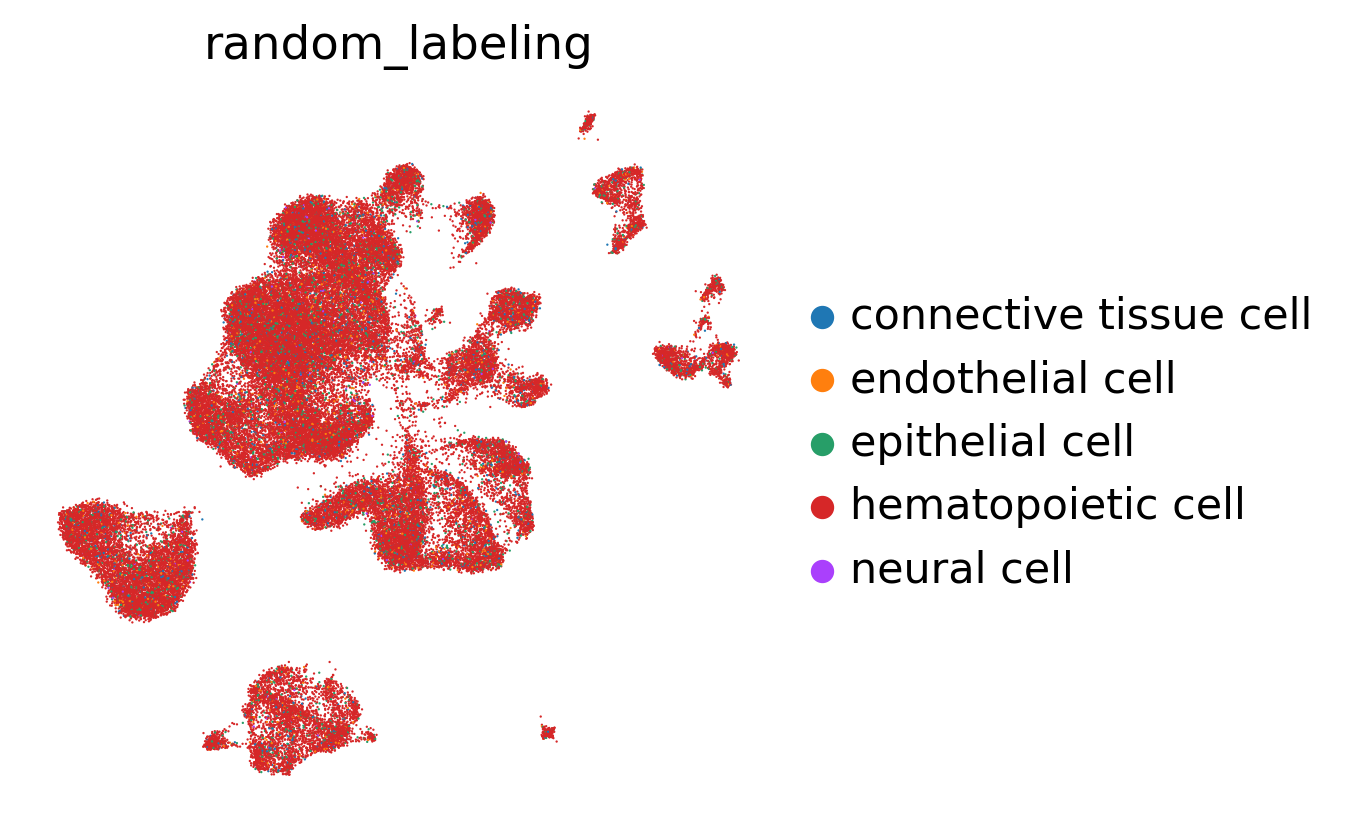

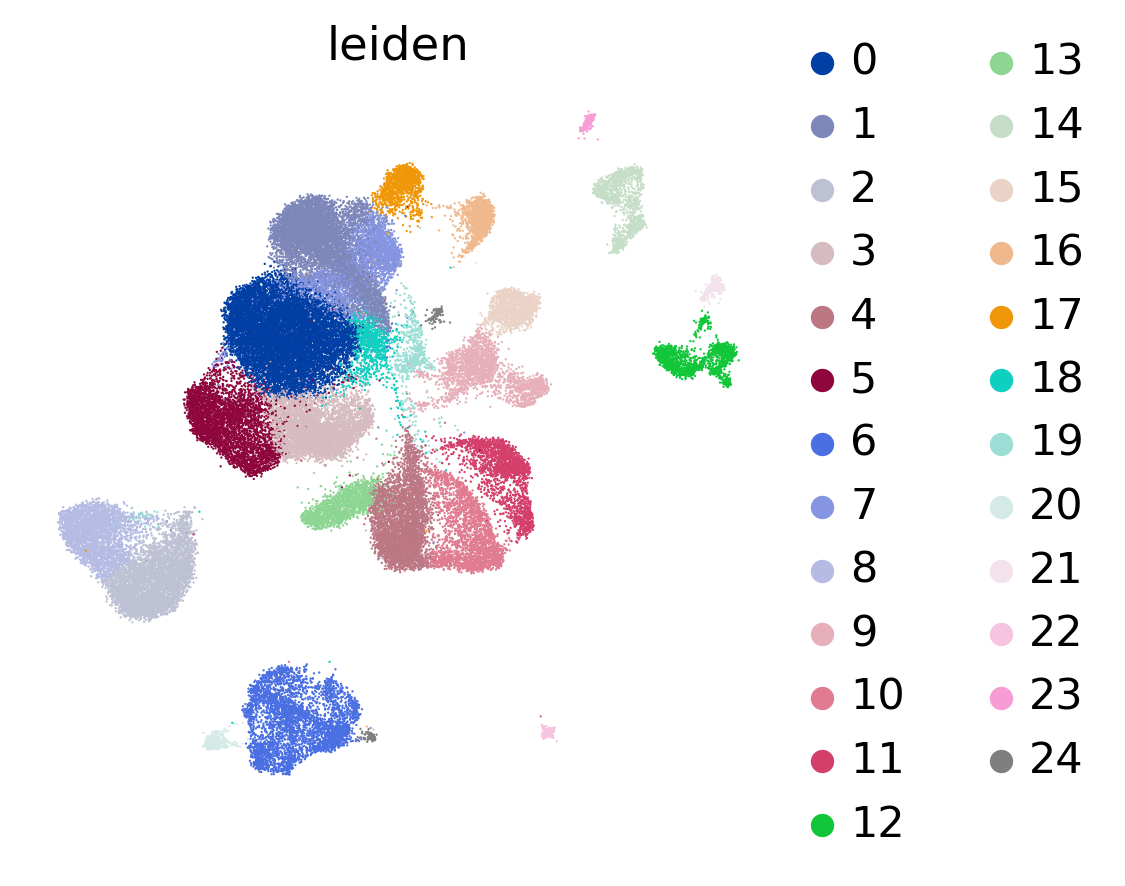

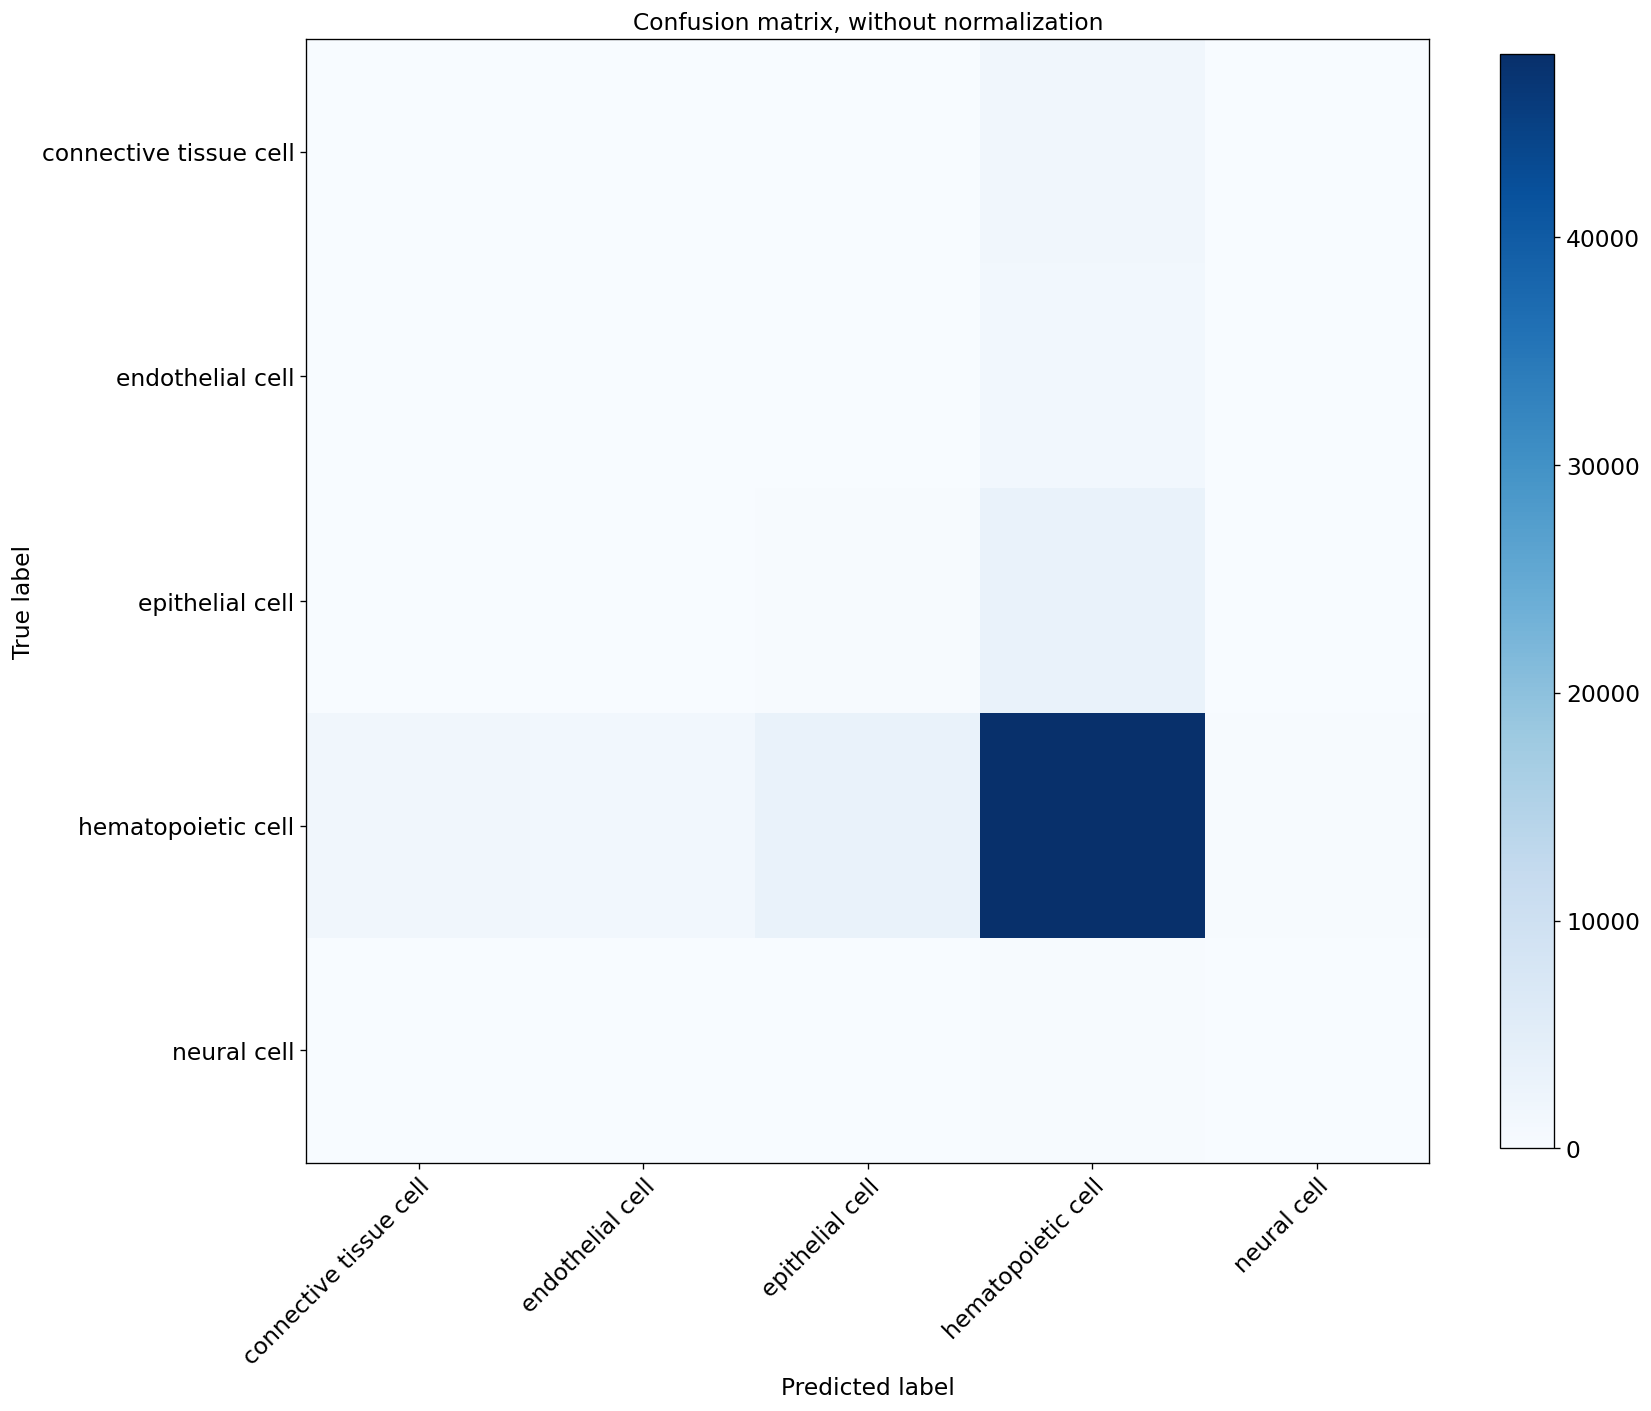

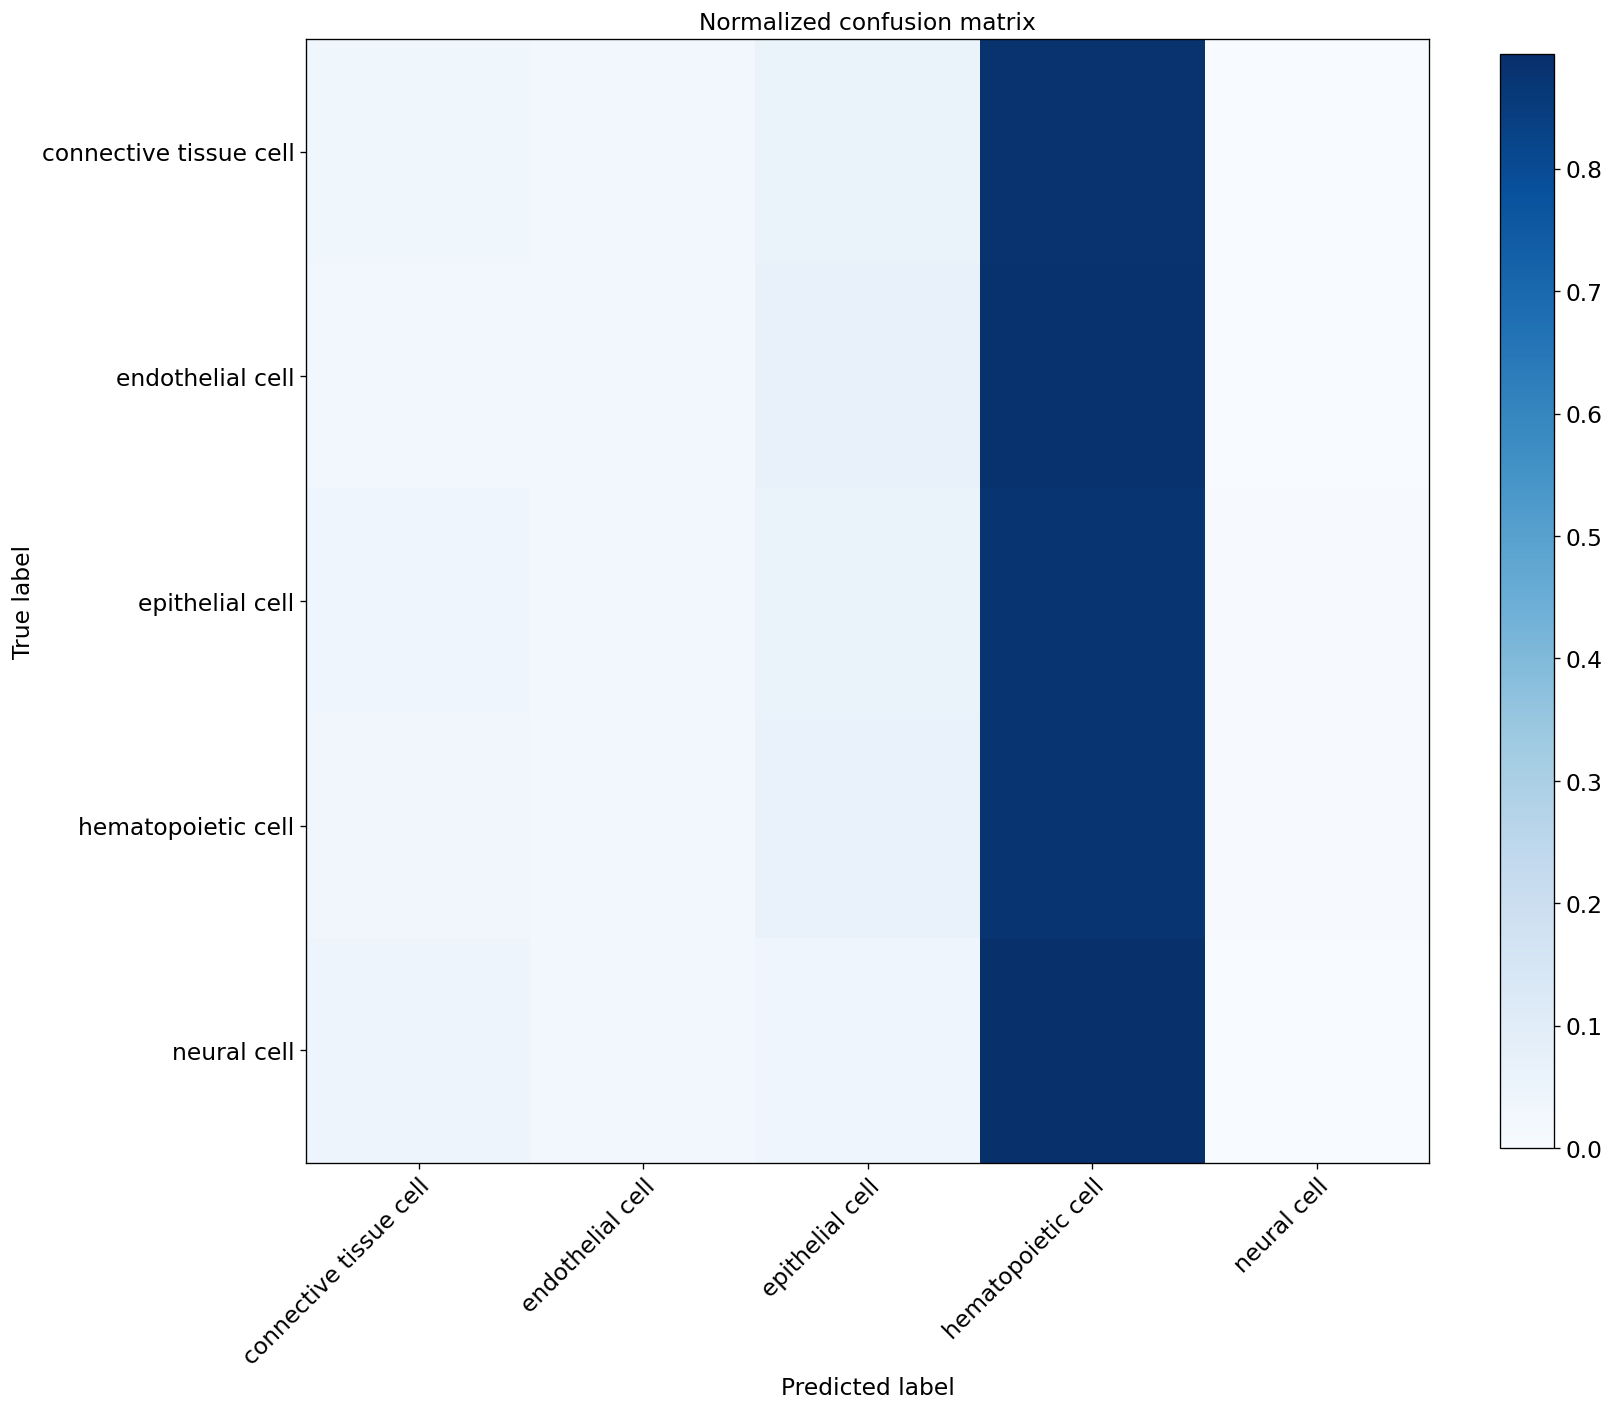

In [25]:
# Compare to random assignment
import random
random.seed(1)
adata_predicted.obs['random_labeling'] = list(adata_predicted.obs[celltype_test].sample(frac=1))

bc.tl.report(
    adata_pred=adata_predicted,
    celltype=celltype_test, 
    method="compare_to_random_" + method, 
    analysis_name=analysis_name,
    train_datasets = adata_trains,
    test_dataset = adata_orig,
    merge = merge,
    name_prediction="random_labeling",
    name_report="compare_to_random_auto_annot", 
    use_raw=use_raw,
    remove_nonshared=True, 
    clustering='leiden', 
    asymmetric_matrix=True, 
    delimiter='\t', 
    verbose=True)

In [26]:
from sinfo import sinfo
sinfo()

-----
anndata             0.7.5
besca               2.4+57.g5ad53b2
pandas              1.2.2
pkg_resources       NA
plotly              4.14.3
scanpy              1.6.1
sinfo               0.3.1
sklearn             0.24.1
-----
IPython             7.20.0
jupyter_client      6.1.11
jupyter_core        4.7.1
notebook            6.2.0
-----
Python 3.7.9 | packaged by conda-forge | (default, Dec  9 2020, 21:08:20) [GCC 9.3.0]
Linux-3.10.0-693.11.6.el7.x86_64-x86_64-with-centos-7.4.1708-Core
24 logical CPU cores, x86_64
-----
Session information updated at 2021-07-17 18:12


### Convert to html

In [38]:
%%javascript

IPython.notebook.kernel.execute('nb_name = "' + IPython.notebook.notebook_name + '"')

<IPython.core.display.Javascript object>

In [39]:
nb_name = os.path.join(os.getcwd(), nb_name)

In [40]:
! jupyter nbconvert --to html {nb_name}

[NbConvertApp] Converting notebook /pstore/data/bioinfo/users/hatjek/devel/besca_publication_results/intestine/auto_annot/auto_annot_Martin2019_with_Smillie2019_dblabel_l1.ipynb to html
[NbConvertApp] Writing 9281873 bytes to /pstore/data/bioinfo/users/hatjek/devel/besca_publication_results/intestine/auto_annot/auto_annot_Martin2019_with_Smillie2019_dblabel_l1.html
